## Diagrams

This notebook reviews the basic functionality of the code I have developed. The core methods are all in `spiders.py` which extends discopy to define the Z,W and X spiders.

They can be imported as follows:

In [1]:
from spiders import W, ZBox, Z, X

Spiders can be built and plugged together as follows. `@` stands for $\otimes$ and `>>` stands for $\circ$

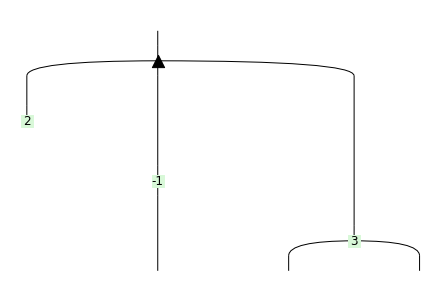

In [2]:
diag = W(1, 3) >> ZBox(1, 0, 2) @ ZBox(1, 1, -1) @ ZBox(1, 2, 3)
diag.draw()

Identity wires and swaps must be imported seperately.

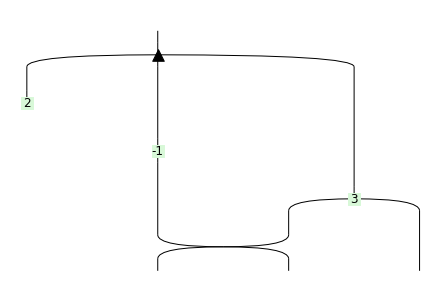

In [3]:
from spiders import Id, Swap

diag >>= Swap @ Id(1)
diag.draw()

To evaluate or compare diagrams, import `eval` and `eq` from `pyfile.py`. 

`discopy.drawing` can be used to format diagrams more nicely

In [4]:
from pyfile import eval, eq
eval(diag)

array([[ 1.+0.j,  2.+0.j],
       [ 0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j],
       [ 0.+0.j,  3.+0.j],
       [ 0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j]])

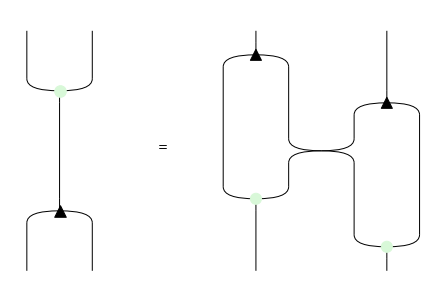

In [5]:
from discopy.drawing import Equation

bzw1 = Z(2, 1) >> W(1, 2)
bzw2 = W(1, 2) @ W(1, 2) >> Id(1) @ Swap @ Id(1) >> Z(2, 1) @ Z(2, 1)
assert eq(bzw1, bzw2)
Equation(bzw1, bzw2).draw()


## Polynomials

The code below takes a statevector $\psi = \begin{bmatrix}a_0 \\ a_1 \\ ... \\ a_{2^n-1} \end{bmatrix}$ and writes it as a polynomial $a_0 + a_1x_n + ... a_{2^n-1}x_1x_2...x_n$. By default, it assumes a bipartite state between A and B with $n_A = n_B$, however this can be parameterised.

In [6]:
from polys import get_poly

bell_state = eval(Z(0, 2))
bell_poly = get_poly(bell_state, n_A=2)
bell_poly

Poly(1.0*x_0*x_1 + 1.0, x_0, x_1, domain='RR')

In [10]:
bell_poly_bipartite = get_poly(bell_state)
bell_poly_bipartite

Poly(1.0*x_0*y_0 + 1.0, x_0, y_0, domain='RR')

Polynomials can easily be factored, evaluated and subsituted in `sympy`

In [11]:
bellbell = get_poly(eval(Z(0, 2) @ Z(0, 2)))
bellbell.factor_list()

(1.00000000000000,
 [(Poly(1.0*y_0*y_1 + 1.0, x_0, x_1, y_0, y_1, domain='RR'), 1),
  (Poly(1.0*x_0*x_1 + 1.0, x_0, x_1, y_0, y_1, domain='RR'), 1)])

In [17]:
bellbell(1, 1, 1)

Poly(2.0*y_1 + 2.0, y_1, domain='RR')

In [16]:
from sympy import symbols
x0, y0 = symbols('x_0, y_0,')
bellbell.subs(y0, x0)

1.0*x_0**2*x_1*y_1 + 1.0*x_0*x_1 + 1.0*x_0*y_1 + 1.0